In [503]:
import pandas as pd
import numpy as np
from IPython.display import Markdown
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [610]:
path = "../../../data/Faker_Data/Cleaned_Data/train_cleaned.csv"
df = pd.read_csv(path)

In [611]:
df.head()

employee_id  age  gender  years_at_company    job_role  monthly_income  \
0        51005   20    Male                 0  Healthcare            3399   
1        11454   34  Female                13     Finance           14568   
2         9692   44    Male                16  Technology           13291   
3        51993   37  Female                 6  Technology            7699   
4        23532   38    Male                 3   Education            7698   

  work_life_balance job_satisfaction performance_rating  number_of_promotions  \
0              Poor              Low            Average                     0   
1              Good           Medium            Average                     3   
2              Good        Very High          Excellent                     4   
3              Good             High               High                     1   
4              Good        Very High          Excellent                     1   

   ... job_level  company_size remote_work leadership_opportunities  \
0  ...     Entry         Small          No                       No   
1  ...    Senior         Large          No                      Yes   
2  ...    Senior         Small          No                      Yes   
3  ...       Mid        Medium         Yes                      Yes   
4  ...       Mid         Large          No                       No   

   innovation_opportunities company_reputation employee_recognition attrition  \
0                       Yes               Poor                  Low      Left   
1                       Yes               Good                 High    Stayed   
2                       Yes          Excellent                 High    Stayed   
3                       Yes               Good                 High    Stayed   
4                        No               Good            Very High    Stayed   

  age_groups age_before_working  
0      18-25                 20  
1      26-35                 21  
2      36-45                 28  
3      36-45                 31  
4      36-45                 35  

[5 rows x 25 columns]

In [612]:
df.isna().sum()

employee_id                 0
age                         0
gender                      0
years_at_company            0
job_role                    0
monthly_income              0
work_life_balance           0
job_satisfaction            0
performance_rating          0
number_of_promotions        0
overtime                    0
distance_from_home          0
education_level             0
marital_status              0
number_of_dependents        0
job_level                   0
company_size                0
remote_work                 0
leadership_opportunities    0
innovation_opportunities    0
company_reputation          0
employee_recognition        0
attrition                   0
age_groups                  0
age_before_working          0
dtype: int64

In [613]:
df.duplicated().sum()

np.int64(0)

In [614]:
len(df)

72000

In [509]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72000 entries, 0 to 71999
Data columns (total 25 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   employee_id               72000 non-null  int64 
 1   age                       72000 non-null  int64 
 2   gender                    72000 non-null  object
 3   years_at_company          72000 non-null  int64 
 4   job_role                  72000 non-null  object
 5   monthly_income            72000 non-null  int64 
 6   work_life_balance         72000 non-null  object
 7   job_satisfaction          72000 non-null  object
 8   performance_rating        72000 non-null  object
 9   number_of_promotions      72000 non-null  int64 
 10  overtime                  72000 non-null  object
 11  distance_from_home        72000 non-null  int64 
 12  education_level           72000 non-null  object
 13  marital_status            72000 non-null  object
 14  number_of_dependents  

In [510]:
df.describe()

employee_id           age  years_at_company  monthly_income  \
count  72000.000000  72000.000000      72000.000000    72000.000000   
mean   45007.817514     37.547014          9.775653     8132.263444   
std    26014.027462      9.727733          8.158286     3972.592533   
min        1.000000     18.000000          0.000000     2410.000000   
25%    22472.750000     31.000000          3.000000     4765.000000   
50%    45005.500000     37.000000          8.000000     7325.000000   
75%    67581.250000     44.000000         15.000000    10338.000000   
max    89999.000000     65.000000         47.000000    19837.000000   

       number_of_promotions  distance_from_home  number_of_dependents  \
count          72000.000000        72000.000000          72000.000000   
mean               1.604347           19.407847              1.433236   
std                1.997811           14.055832              1.378380   
min                0.000000            1.000000              0.000000   
25%                0.000000            9.000000              0.000000   
50%                1.000000           16.000000              1.000000   
75%                2.000000           26.000000              2.000000   
max               16.000000          134.000000              5.000000   

       age_before_working  
count        72000.000000  
mean            27.771361  
std              8.144334  
min             18.000000  
25%             21.000000  
50%             26.000000  
75%             33.000000  
max             65.000000

### Attrition

In [511]:
df["attrition"].unique()

array(['Left', 'Stayed'], dtype=object)

In [512]:
df["attrition"].describe()

count      72000
unique         2
top       Stayed
freq       48613
Name: attrition, dtype: object

In [513]:
df["attrition"].value_counts()

attrition
Stayed    48613
Left      23387
Name: count, dtype: int64

<Axes: xlabel='attrition', ylabel='count'>

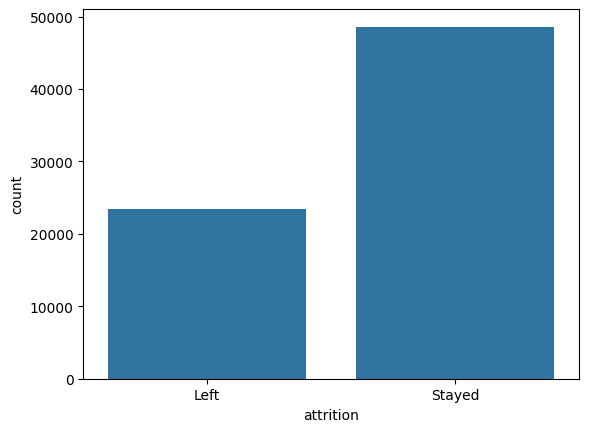

In [514]:
sns.countplot(x="attrition", data=df)

In [515]:
attrition_rate = df["attrition"].value_counts()["Left"] / len(df) * 100
display(Markdown(f"### Attrition rate {attrition_rate}%"))

### Attrition rate 32.481944444444444%

### Years at Company

In [516]:
df["years_at_company"].unique()

array([ 0, 13, 16,  6,  3, 12,  1,  2, 26, 20, 19,  9, 21,  7, 40, 28,  8,
       23,  5, 18, 15, 10,  4, 11, 22, 25, 27, 30, 14, 24, 29, 17, 33, 35,
       32, 31, 37, 38, 45, 34, 41, 42, 44, 39, 36, 43, 46, 47])

In [517]:
# Remove the employees that has a zero years at company
# df = df[df["years_at_company"] != 0]
df = df[~((df["years_at_company"] == 0) & (df.age > 45))]

In [518]:
df["years_at_company"].describe()

count    71569.000000
mean         9.834523
std          8.147361
min          0.000000
25%          3.000000
50%          8.000000
75%         15.000000
max         47.000000
Name: years_at_company, dtype: float64

In [519]:
#The mode of the years at the company
df["years_at_company"].mode()

0    0
Name: years_at_company, dtype: int64

In [520]:
df["years_at_company"].value_counts()

years_at_company
0     6256
1     4586
2     4301
3     3996
4     3871
5     3755
6     3636
7     3424
8     3282
9     3063
10    2920
11    2744
12    2599
13    2398
14    2307
15    2083
16    1901
17    1743
18    1655
19    1422
20    1245
21    1176
22    1076
23    1029
24     747
25     734
26     580
27     533
28     446
29     374
30     315
31     295
32     217
34     166
33     164
35     121
36     101
37      82
38      59
39      47
40      33
41      23
42      18
43      14
44      11
45       8
46       8
47       5
Name: count, dtype: int64

In [521]:
display(df.loc[df["attrition"] == "Left", "years_at_company"].describe()) # left employees
display(df.loc[df["attrition"] == "Stayed", "years_at_company"].describe()) # Stayed employees

count    23222.000000
mean         9.465335
std          8.017845
min          0.000000
25%          3.000000
50%          8.000000
75%         14.000000
max         47.000000
Name: years_at_company, dtype: float64

count    48347.000000
mean        10.011852
std          8.203020
min          0.000000
25%          3.000000
50%          8.000000
75%         15.000000
max         47.000000
Name: years_at_company, dtype: float64

<Axes: xlabel='years_at_company', ylabel='Count'>

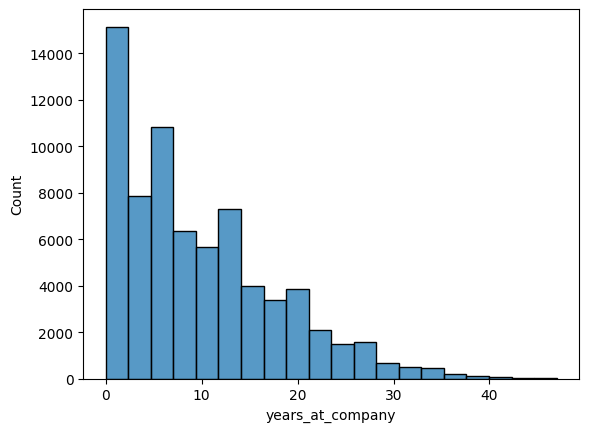

In [522]:
sns.histplot(df["years_at_company"], bins=20)

In [523]:
attrition_rate_each_year = {}
for i in df["years_at_company"].unique():
    rate = len(df.loc[(df["attrition"] == "Left") & (df["years_at_company"] == i)]) / len(df[df["years_at_company"] == i])
    attrition_rate_each_year[int(i)] = rate

In [524]:
top10_attrition_rates = dict(sorted(attrition_rate_each_year.items(), key=lambda x: x[1], reverse=True)[:10])
# top10_attrition_rates = dict(sorted(top10_attrition_rates.items(), key=lambda x: x[1], reverse=True))
top10_attrition_rates

{44: 0.45454545454545453,
 39: 0.425531914893617,
 2: 0.3678214368751453,
 5: 0.351797603195739,
 0: 0.35134271099744246,
 41: 0.34782608695652173,
 35: 0.34710743801652894,
 1: 0.3440907108591365,
 6: 0.3388338833883388,
 7: 0.33703271028037385}

In [525]:
bot10_attrition_rates = dict(sorted(attrition_rate_each_year.items(), key=lambda x: x[1])[:10])
# bot10_attrition_rates = dict(sorted(bot10_attrition_rates.items(), key=lambda x: x[1]))
bot10_attrition_rates

{42: 0.16666666666666666,
 47: 0.2,
 38: 0.23728813559322035,
 45: 0.25,
 46: 0.25,
 30: 0.2698412698412698,
 33: 0.27439024390243905,
 37: 0.2804878048780488,
 20: 0.28353413654618476,
 43: 0.2857142857142857}

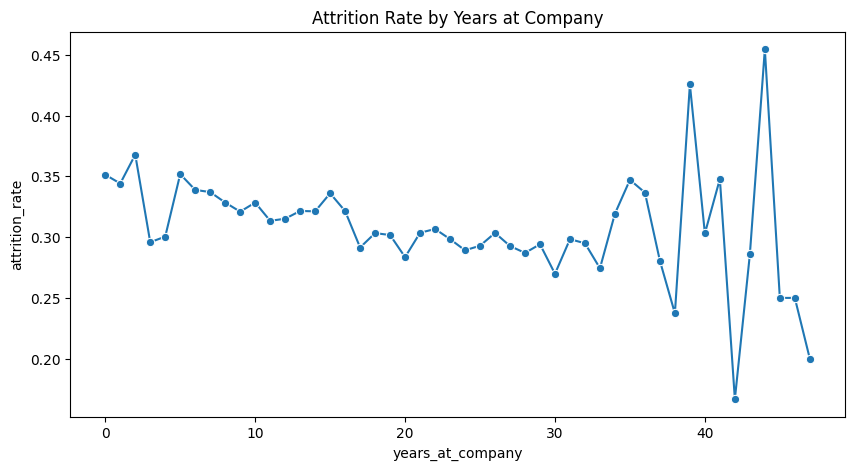

In [526]:
df_attr = pd.DataFrame(list(attrition_rate_each_year.items()), columns=["years_at_company", "attrition_rate"])

plt.figure(figsize=(10,5))
sns.lineplot(x="years_at_company", y="attrition_rate", data=df_attr, marker='o')
plt.title("Attrition Rate by Years at Company")
plt.show()


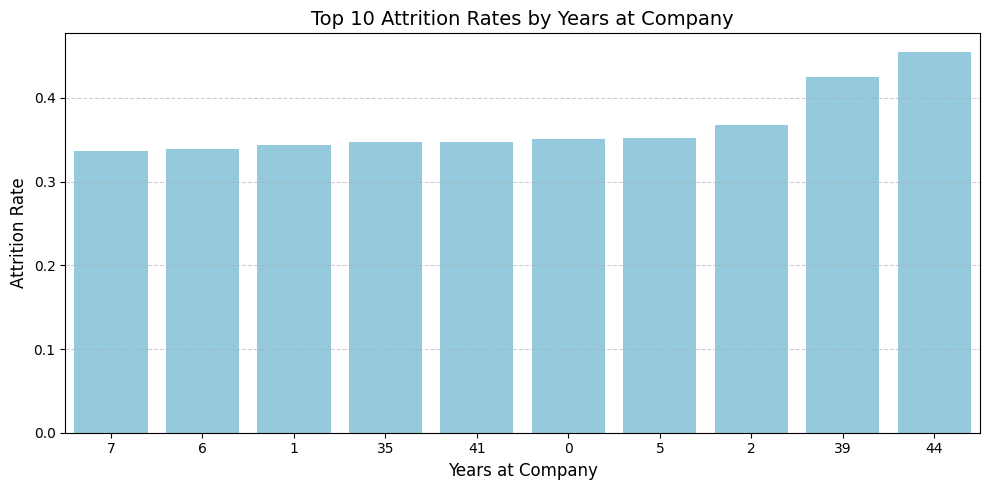

In [527]:
df_top10 = pd.DataFrame(list(top10_attrition_rates.items()), columns=["years_at_company", "attrition_rate"])
df_top10 = df_top10.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_top10, x="years_at_company", y="attrition_rate", color="skyblue", order=df_top10.sort_values("attrition_rate")["years_at_company"])

plt.title("Top 10 Attrition Rates by Years at Company", fontsize=14)
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


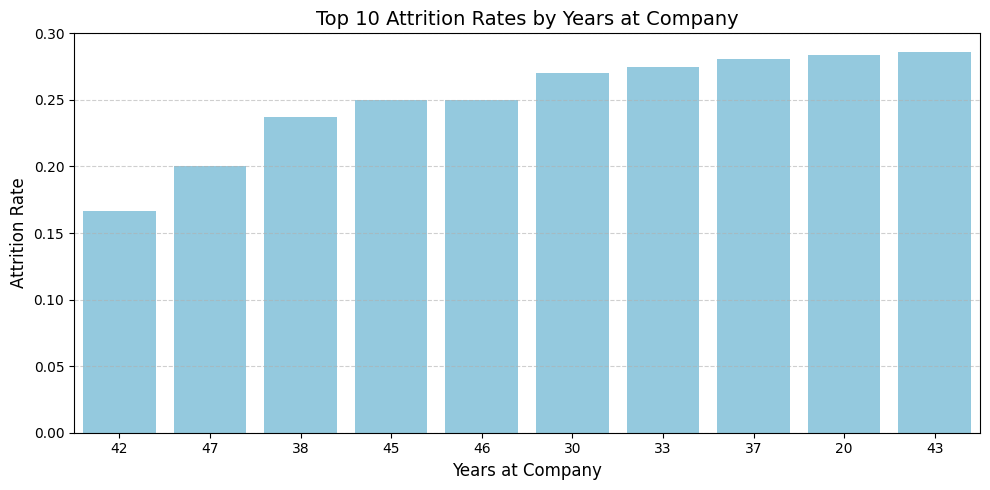

In [528]:
df_least10 = pd.DataFrame(list(bot10_attrition_rates.items()), columns=["years_at_company", "attrition_rate"])
df_least10 = df_least10.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_least10, x="years_at_company", y="attrition_rate", color="skyblue", order=df_least10.sort_values("attrition_rate")["years_at_company"])

plt.title("Top 10 Attrition Rates by Years at Company", fontsize=14)
plt.xlabel("Years at Company", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

#### Insights
* The highest attrition rate is on 39 years at company
* The lowest attrition rate is on 47 years at company
* The Attrition rate tend to get decrease as the years at company increase but there is points that the attrition gets high

### Monthly Income

In [529]:
df["monthly_income"].describe()

count    71569.000000
mean      8154.795791
std       3972.528039
min       2410.000000
25%       4798.000000
50%       7345.000000
75%      10384.000000
max      19837.000000
Name: monthly_income, dtype: float64

In [530]:
income_decribtion_with_attrition = df.groupby(["attrition"])["monthly_income"].describe()
income_decribtion_with_attrition

count         mean          std     min      25%     50%  \
attrition                                                               
Left       23222.0  7885.881836  3896.737016  2413.0  4649.25  7131.5   
Stayed     48347.0  8283.960370  4002.043505  2410.0  4900.00  7448.0   

                75%      max  
attrition                     
Left        9783.75  19837.0  
Stayed     10721.50  19835.0

In [531]:
import pandas as pd

bins = [0, 3000, 6000, 9000, 12000, df["monthly_income"].max()]
income_labels = ["Very Low", "Low", "Medium", "High", "Very High"]

df["income_band"] = pd.cut(df["monthly_income"], bins=bins, labels=income_labels, include_lowest=True)
income_order = ["Very High", "High", "Medium", "Low", "Very Low"]
df["income_band"] = pd.Categorical(df["income_band"], categories=income_order, ordered=True)

# Check counts
df["income_band"].value_counts().sort_index(ascending=False)


income_band
Very Low      1346
Low          23279
Medium       24130
High          8329
Very High    14485
Name: count, dtype: int64

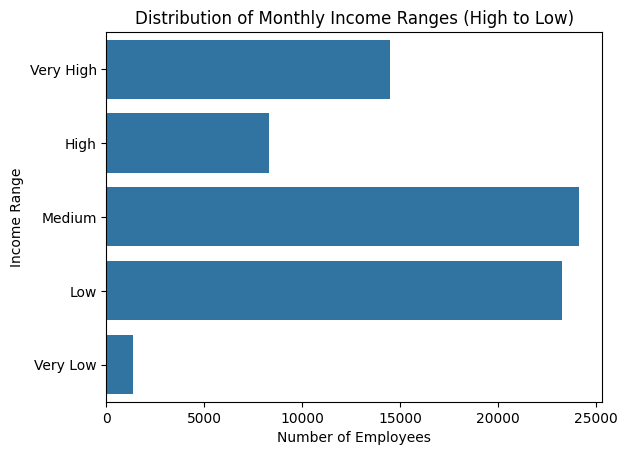

In [532]:
sns.countplot(y="income_band", data=df, order=income_order)
plt.title("Distribution of Monthly Income Ranges (High to Low)")
plt.xlabel("Number of Employees")
plt.ylabel("Income Range")
plt.show()


In [533]:
attrition_rate_per_income_band = {}
for i in income_labels:
    rate = len(df.loc[(df["attrition"] == "Left") & (df["income_band"] == i)]) / len(df[df["income_band"] == i])
    attrition_rate_per_income_band[i] = rate

attrition_rate_per_income_band

{'Very Low': 0.45988112927191677,
 'Low': 0.3552558099574724,
 'Medium': 0.3096560298383755,
 'High': 0.3250090046824349,
 'Very High': 0.2867794269934415}

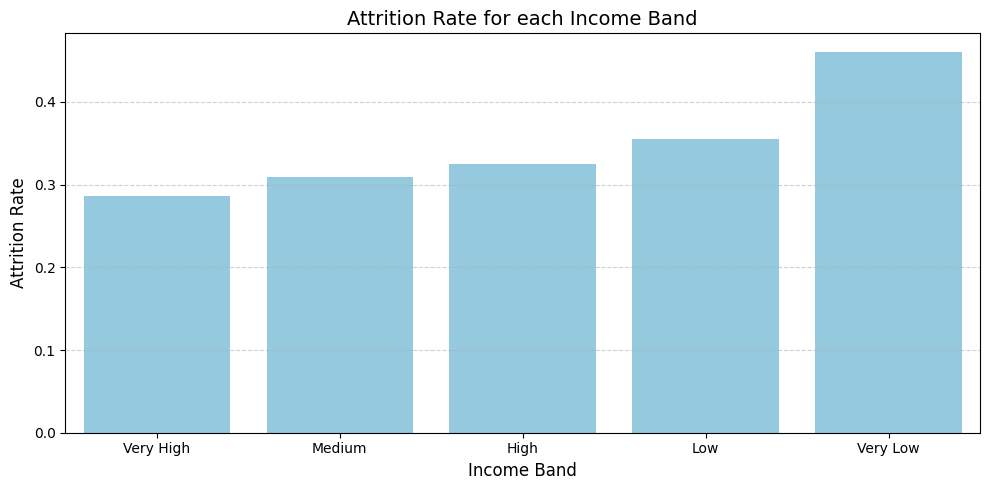

In [534]:
df_attr_income = pd.DataFrame(list(attrition_rate_per_income_band.items()), columns=["income_band", "attrition_rate"])
df_attr_income = df_attr_income.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_attr_income, x="income_band", y="attrition_rate", color="skyblue", order=df_attr_income.sort_values("attrition_rate")["income_band"])

plt.title("Attrition Rate for each Income Band", fontsize=14)
plt.xlabel("Income Band", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### The Attrition Rate Increases as the income deacreases

### Job Role

In [535]:
df["job_role"].unique()

array(['Healthcare', 'Finance', 'Technology', 'Education', 'Media'],
      dtype=object)

In [536]:
df["job_role"].describe()

count          71569
unique             5
top       Technology
freq           21268
Name: job_role, dtype: object

In [537]:
job_role_count = df["job_role"].value_counts()
job_role_count

job_role
Technology    21268
Healthcare    17785
Finance       14364
Education     10769
Media          7383
Name: count, dtype: int64

In [538]:
job_role_count = dict(job_role_count)
for i in job_role_count:
    job_role_count[i] = int(job_role_count[i])

job_role_count

{'Technology': 21268,
 'Healthcare': 17785,
 'Finance': 14364,
 'Education': 10769,
 'Media': 7383}

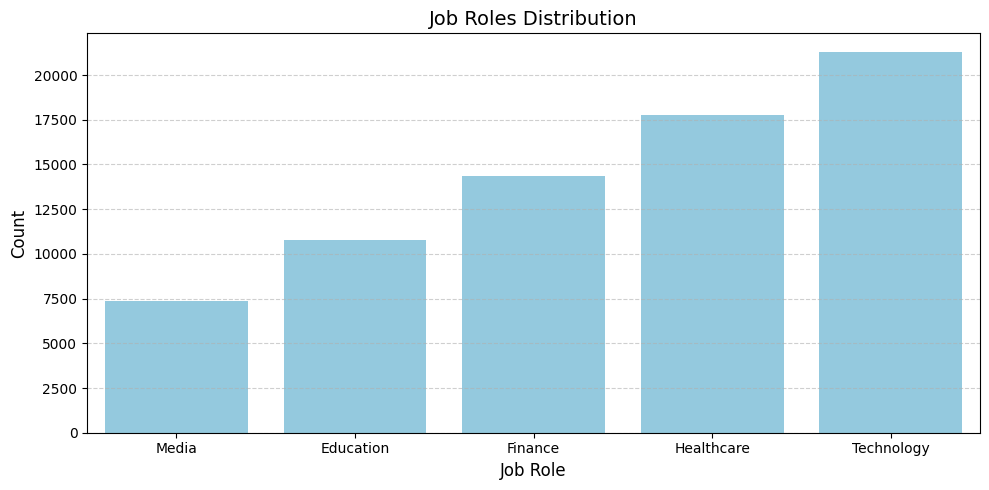

In [539]:
df_job_role_count = pd.DataFrame(list(job_role_count.items()), columns=["job_role", "count"])
df_job_role_count = df_job_role_count.sort_values("count", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_job_role_count, x="job_role", y="count", color="skyblue", order=df_job_role_count.sort_values("count")["job_role"])

plt.title("Job Roles Distribution", fontsize=14)
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [540]:
attrition_rate_per_job_role = {}
for i in df["job_role"].unique():
    rate = len(df.loc[(df["attrition"] == "Left") & (df["job_role"] == i)]) / len(df[df["job_role"] == i])
    attrition_rate_per_job_role[i] = rate

attrition_rate_per_job_role

{'Healthcare': 0.3120607253303346,
 'Finance': 0.31084656084656087,
 'Technology': 0.3228794432950912,
 'Education': 0.3598291391958399,
 'Media': 0.3338751185155086}

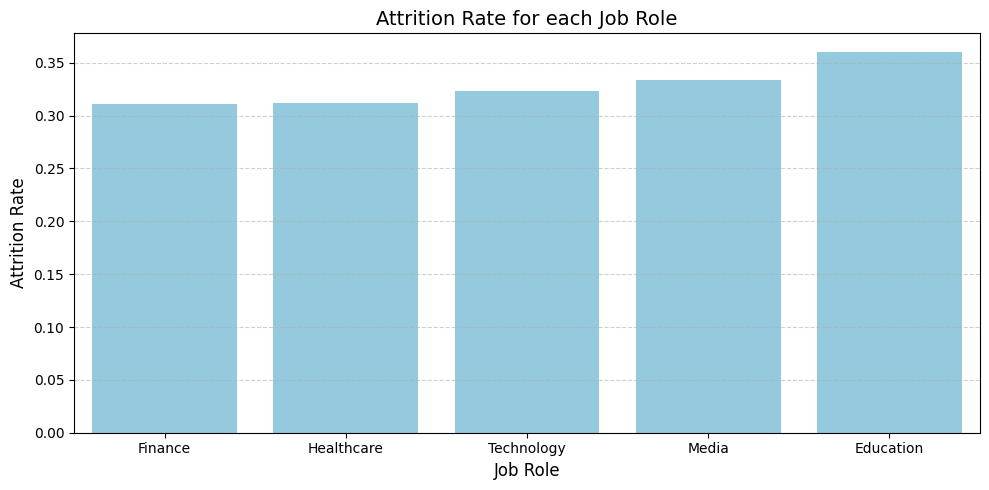

In [541]:
df_attr_job_role = pd.DataFrame(list(attrition_rate_per_job_role.items()), columns=["job_role", "attrition_rate"])
df_attr_job_role = df_attr_job_role.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_attr_job_role, x="job_role", y="attrition_rate", color="skyblue", order=df_attr_job_role.sort_values("attrition_rate")["job_role"])

plt.title("Attrition Rate for each Job Role", fontsize=14)
plt.xlabel("Job Role", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* The technology sectory has the highest employees with <b style = "color: skyblue">24296</b> which is <b style = "color: skyblue">29.8%</b> of all employees
* And the media has <b style = "color: skyblue">8334</b> which is the lowest with <b style = "color: skyblue">10%</b>
##### 
* The highest attrition rate is in the Education level with <b style = "color: skyblue">36.3%</b>
* And the lowest is in the Healthcare with <b style = "color: skyblue">31%</b>

### Work-life Balance

In [542]:
df["work_life_balance"].describe()

count     71569
unique        4
top        Good
freq      30185
Name: work_life_balance, dtype: object

In [543]:
work_life_balance_count = df["work_life_balance"].value_counts()
work_life_balance_count

work_life_balance
Good         30185
Poor         14203
Fair         14172
Excellent    13009
Name: count, dtype: int64

In [544]:
work_life_balance_count = dict(work_life_balance_count)
for i in work_life_balance_count:
    work_life_balance_count[i] = int(work_life_balance_count[i])

work_life_balance_count

{'Good': 30185, 'Poor': 14203, 'Fair': 14172, 'Excellent': 13009}

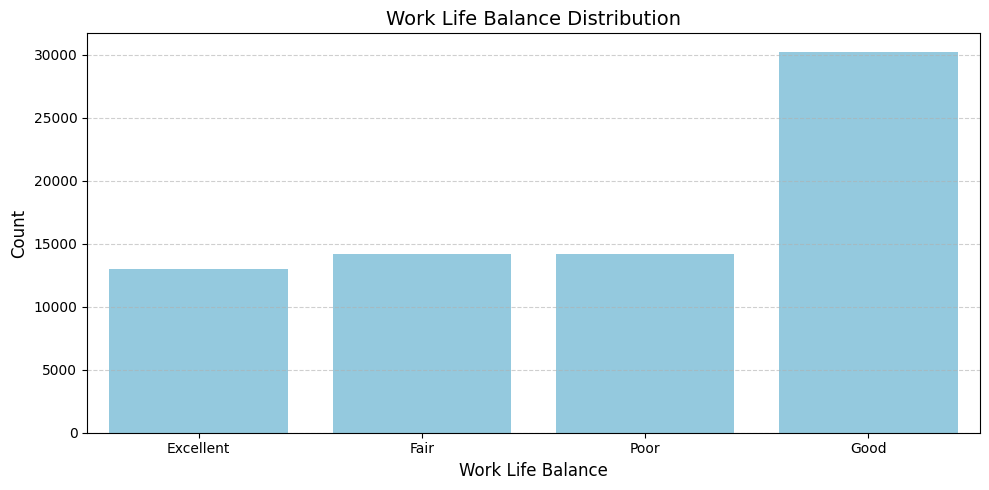

In [545]:
df_work_life_balance_count = pd.DataFrame(list(work_life_balance_count.items()), columns=["work_life_balance", "count"])
df_work_life_balance_count = df_work_life_balance_count.sort_values("count", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_work_life_balance_count, x="work_life_balance", y="count", color="skyblue", order=df_work_life_balance_count.sort_values("count")["work_life_balance"])

plt.title("Work Life Balance Distribution", fontsize=14)
plt.xlabel("Work Life Balance", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [546]:
attrition_rate_per_work_life_balance = {}
for i in df["work_life_balance"].unique():
    rate = len(df.loc[(df["attrition"] == "Left") & (df["work_life_balance"] == i)]) / len(df[df["work_life_balance"] == i])
    attrition_rate_per_work_life_balance[i] = rate

attrition_rate_per_work_life_balance

{'Poor': 0.858691825670633,
 'Good': 0.10969024349842638,
 'Fair': 0.5018346034434096,
 'Excellent': 0.04635252517487893}

In [547]:
df.groupby(["work_life_balance"])["attrition"].describe()

count unique     top   freq
work_life_balance                             
Excellent          13009      2  Stayed  12406
Fair               14172      2    Left   7112
Good               30185      2  Stayed  26874
Poor               14203      2    Left  12196

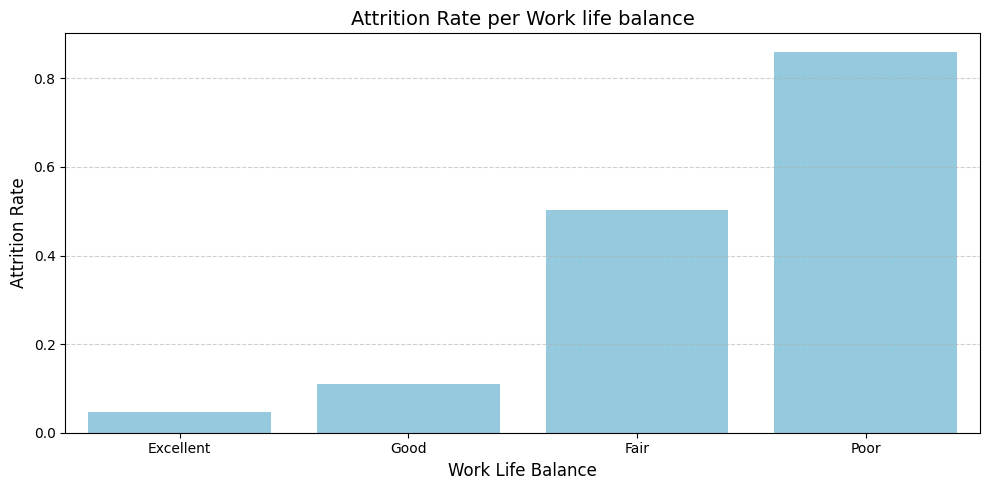

In [548]:
df_attr_rate_per_work_life_balance = pd.DataFrame(list(attrition_rate_per_work_life_balance.items()), columns=["work_life_balance", "attrition_rate"])
df_attr_rate_per_work_life_balance = df_attr_rate_per_work_life_balance.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_attr_rate_per_work_life_balance, x="work_life_balance", y="attrition_rate", color="skyblue", order=df_attr_rate_per_work_life_balance.sort_values("attrition_rate")["work_life_balance"])

plt.title("Attrition Rate per Work life balance", fontsize=14)
plt.xlabel("Work Life Balance", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* The Attrition Rate increasing as the employee can not balance between the personal life work
* Employees with <b>Poor</b> life balance has attrition rate to <b style = "color : skyblue">86%</b> and <b>Fair</b> life balance <b style = "color : skyblue">49.8%</b>

### Job Satisfaction

In [549]:
df["job_satisfaction"].unique()

array(['Low', 'Medium', 'Very High', 'High'], dtype=object)

In [550]:
job_satisfaction_count = df["job_satisfaction"].value_counts()
job_satisfaction_count

job_satisfaction
High         24893
Medium       15814
Low          15684
Very High    15178
Name: count, dtype: int64

In [551]:
job_satisfaction_count = dict(job_satisfaction_count)
for i in job_satisfaction_count:
    job_satisfaction_count[i] = int(job_satisfaction_count[i])

job_satisfaction_count

{'High': 24893, 'Medium': 15814, 'Low': 15684, 'Very High': 15178}

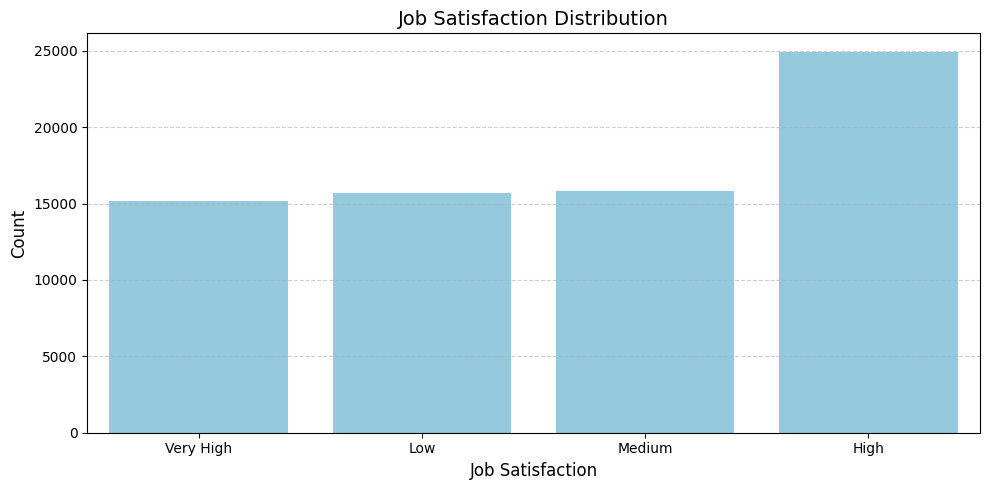

In [552]:
df_job_satisfaction_count = pd.DataFrame(list(job_satisfaction_count.items()), columns=["job_satisfaction", "count"])
df_job_satisfaction_count = df_job_satisfaction_count.sort_values("count", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_job_satisfaction_count, x="job_satisfaction", y="count", color="skyblue", order=df_job_satisfaction_count.sort_values("count")["job_satisfaction"])

plt.title("Job Satisfaction Distribution", fontsize=14)
plt.xlabel("Job Satisfaction", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [553]:
attrition_rate_per_job_satisfaction = {}
for i in df["job_satisfaction"].unique():
    rate = len(df.loc[(df["attrition"] == "Left") & (df["job_satisfaction"] == i)]) / len(df[df["job_satisfaction"] == i])
    attrition_rate_per_job_satisfaction[i] = rate

attrition_rate_per_job_satisfaction

{'Low': 0.8639377709767916,
 'Medium': 0.4573163020108764,
 'Very High': 0.019370140993543287,
 'High': 0.08620897441047684}

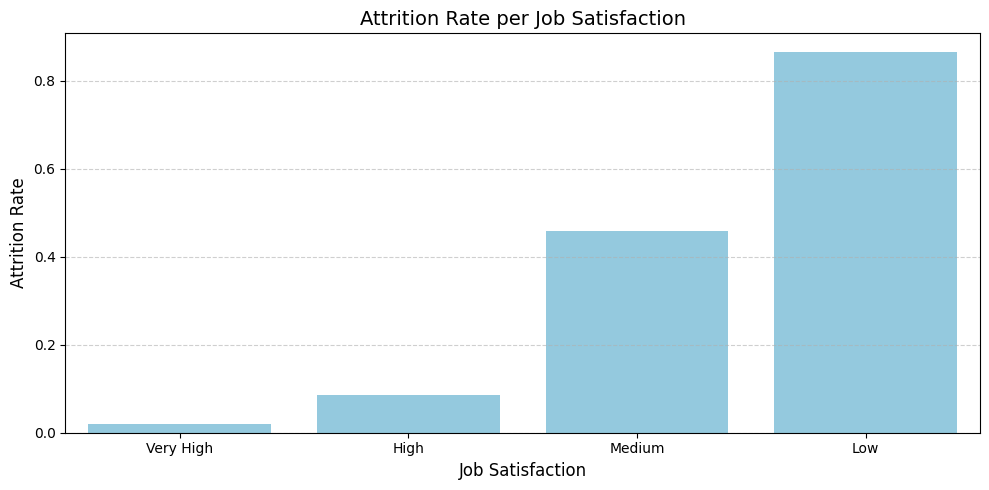

In [554]:
df_attrition_rate_per_job_satisfaction = pd.DataFrame(list(attrition_rate_per_job_satisfaction.items()), columns=["job_satisfaction", "attrition_rate"])
df_attrition_rate_per_job_satisfaction = df_attrition_rate_per_job_satisfaction.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_attrition_rate_per_job_satisfaction, x="job_satisfaction", y="attrition_rate", color="skyblue", order=df_attrition_rate_per_job_satisfaction.sort_values("attrition_rate")["job_satisfaction"])

plt.title("Attrition Rate per Job Satisfaction", fontsize=14)
plt.xlabel("Job Satisfaction", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* The employees that has low job satisfaction tend to has high attrition rate <b>Low and Medium </b>satisfaction has 
<b style = "color :skyblue"> 86.1%, 45.2% </b> respectivly

### Performance Rating

In [555]:
performance_rating_count = df["performance_rating"].value_counts()
performance_rating_count

performance_rating
Average      35795
High         21535
Excellent     7214
Low           7025
Name: count, dtype: int64

In [556]:
performance_rating_count = dict(performance_rating_count)
for i in performance_rating_count:
    performance_rating_count[i] = int(performance_rating_count[i])

performance_rating_count

{'Average': 35795, 'High': 21535, 'Excellent': 7214, 'Low': 7025}

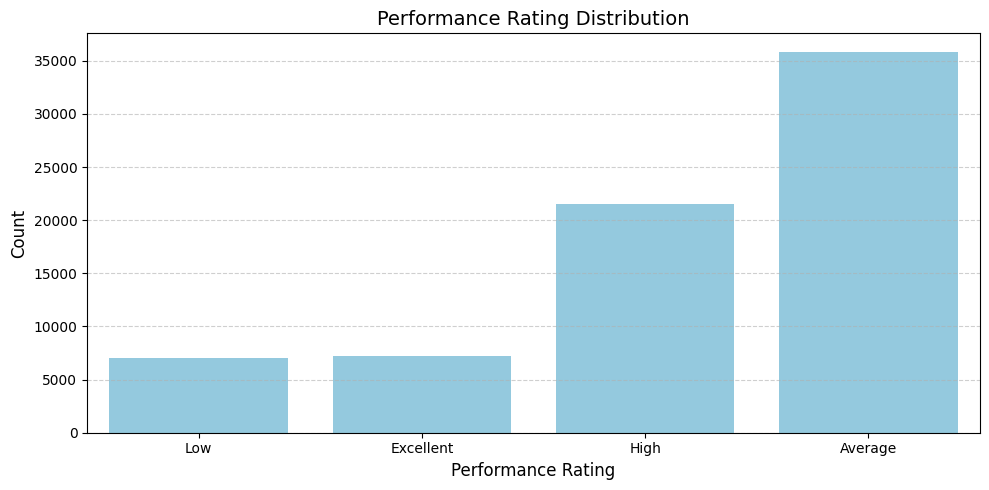

In [557]:
df_performance_rating_count = pd.DataFrame(list(performance_rating_count.items()), columns=["performance_rating", "count"])
df_performance_rating_count = df_performance_rating_count.sort_values("count", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_performance_rating_count, x="performance_rating", y="count", color="skyblue", order=df_performance_rating_count.sort_values("count")["performance_rating"])

plt.title("Performance Rating Distribution", fontsize=14)
plt.xlabel("Performance Rating", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [558]:
attrition_rate_per_performance_rating = {}
for i in df["performance_rating"].unique():
    rate = len(df.loc[(df["attrition"] == "Left") & (df["performance_rating"] == i)]) / len(df[df["performance_rating"] == i])
    attrition_rate_per_performance_rating[i] = rate

attrition_rate_per_performance_rating

{'Average': 0.3240955440704009,
 'Excellent': 0.3221513723315775,
 'High': 0.3254237288135593,
 'Low': 0.32583629893238436}

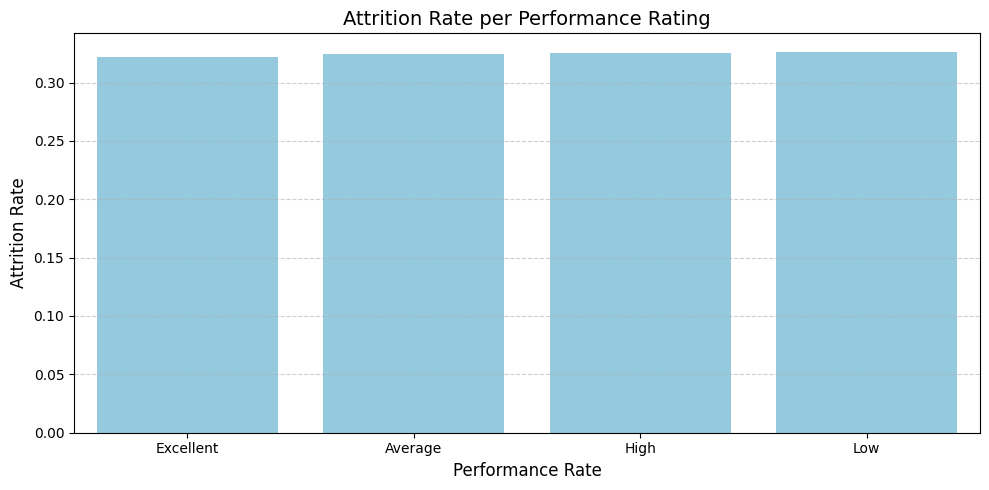

In [559]:
df_attrition_rate_per_performance_rating = pd.DataFrame(list(attrition_rate_per_performance_rating.items()), columns=["performance_rating", "attrition_rate"])
df_attrition_rate_per_performance_rating = df_attrition_rate_per_performance_rating.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_attrition_rate_per_performance_rating, x="performance_rating", y="attrition_rate", color="skyblue", order=df_attrition_rate_per_performance_rating.sort_values("attrition_rate")["performance_rating"])

plt.title("Attrition Rate per Performance Rating", fontsize=14)
plt.xlabel("Performance Rate", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* The performance has no impact on the attrition rate all of them has <b style = "color : skyblue"> 32% </b> attrition rate

### Overtime

In [560]:
overtime_count = df["overtime"].value_counts()
overtime_count

overtime
No     50604
Yes    20965
Name: count, dtype: int64

In [561]:
overtime_count = dict(overtime_count)
for i in overtime_count:
    overtime_count[i] = int(overtime_count[i])

overtime_count

{'No': 50604, 'Yes': 20965}

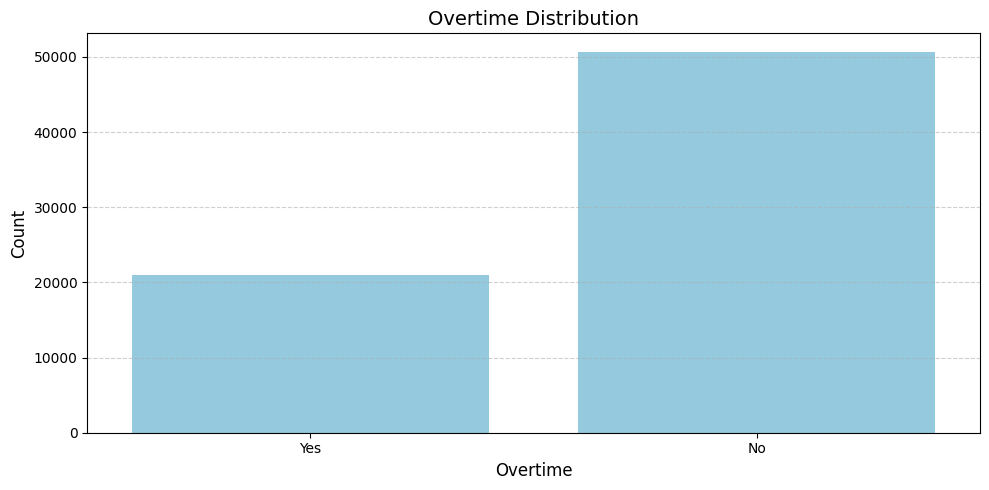

In [562]:
df_overtime_count = pd.DataFrame(list(overtime_count.items()), columns=["overtime", "count"])
df_overtime_count = df_overtime_count.sort_values("count", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_overtime_count, x="overtime", y="count", color="skyblue", order=df_overtime_count.sort_values("count")["overtime"])

plt.title("Overtime Distribution", fontsize=14)
plt.xlabel("Overtime", fontsize=12)
plt.ylabel("Count", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

In [563]:
attrition_rate_overtime = {}
for i in df["overtime"].unique():
    rate = len(df.loc[(df["attrition"] == "Left") & (df["overtime"] == i)]) / len(df[df["overtime"] == i])
    attrition_rate_overtime[i] = rate

attrition_rate_overtime

{'Yes': 0.6564273789649415, 'No': 0.18694174373567307}

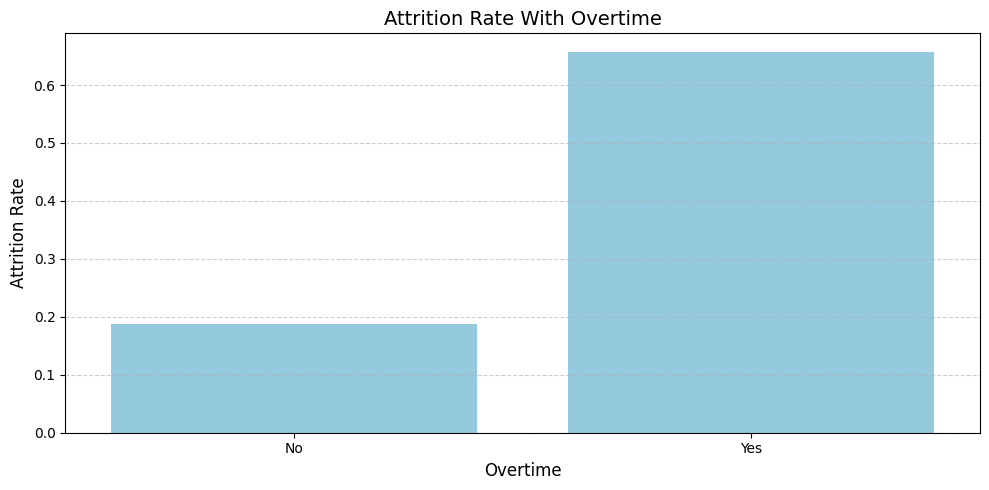

In [564]:
df_attrition_rate_overtime = pd.DataFrame(list(attrition_rate_overtime.items()), columns=["overtime", "attrition_rate"])
df_attrition_rate_overtime = df_attrition_rate_overtime.sort_values("attrition_rate", ascending= False)

plt.figure(figsize=(10,5))
sns.barplot(data=df_attrition_rate_overtime, x="overtime", y="attrition_rate", color="skyblue", order=df_attrition_rate_overtime.sort_values("attrition_rate")["overtime"])

plt.title("Attrition Rate With Overtime", fontsize=14)
plt.xlabel("Overtime", fontsize=12)
plt.ylabel("Attrition Rate", fontsize=12)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

* The employees who work over time has attrition rate <b style = "color : skyblue"> 65.4% </b>

### Job level

In [565]:
df["job_level"].describe()

count     71569
unique        3
top         Mid
freq      32226
Name: job_level, dtype: object

In [566]:
df["job_level"].value_counts()

job_level
Mid       32226
Entry     20550
Senior    18793
Name: count, dtype: int64

In [567]:
df.groupby([ "attrition","job_level", "performance_rating"])["employee_id"].count()

attrition  job_level  performance_rating
Left       Entry      Average                3534
                      Excellent               717
                      High                   2171
                      Low                     705
           Mid        Average                5242
                      Excellent              1051
                      High                   3101
                      Low                    1063
           Senior     Average                2825
                      Excellent               556
                      High                   1736
                      Low                     521
Stayed     Entry      Average                6712
                      Excellent              1375
                      High                   3960
                      Low                    1376
           Mid        Average               10891
                      Excellent              2200
                      High                   6589
         

In [568]:
display(df.groupby([ "job_level","attrition"])["employee_id"].count())

job_level  attrition
Entry      Left          7127
           Stayed       13423
Mid        Left         10457
           Stayed       21769
Senior     Left          5638
           Stayed       13155
Name: employee_id, dtype: int64

In [569]:
# df.loc[(df["years_at_company"] <= df["age"] -18)] #This data that we will be working on if the iqr did not make any sense

### Distance from Home

In [570]:
df.distance_from_home.describe()

count    71569.000000
mean        19.411016
std         14.059812
min          1.000000
25%          9.000000
50%         16.000000
75%         26.000000
max        134.000000
Name: distance_from_home, dtype: float64

In [571]:
df.groupby(["job_role"])["distance_from_home"].describe()

count       mean        std  min  25%   50%   75%    max
job_role                                                              
Education   10769.0  19.396137  14.242357  1.0  9.0  16.0  26.0  121.0
Finance     14364.0  19.307226  13.871822  1.0  9.0  16.0  26.0  121.0
Healthcare  17785.0  19.358729  14.051567  1.0  9.0  16.0  26.0  125.0
Media        7383.0  19.427739  14.175331  1.0  9.0  16.0  26.0  132.0
Technology  21268.0  19.526566  14.060028  1.0  9.0  16.0  27.0  134.0

In [572]:
df.groupby(["attrition"])["distance_from_home"].describe()

count       mean        std  min  25%   50%   75%    max
attrition                                                            
Left       23222.0  19.439885  14.059658  1.0  9.0  16.0  26.0  132.0
Stayed     48347.0  19.397150  14.060010  1.0  9.0  16.0  26.0  134.0

In [573]:
df.groupby(["performance_rating"])["distance_from_home"].describe()

count       mean        std  min  25%   50%   75%    max
performance_rating                                                            
Average             35795.0  19.428775  14.097061  1.0  9.0  16.0  26.0  134.0
Excellent            7214.0  19.210701  13.831960  1.0  9.0  16.0  26.0  125.0
High                21535.0  19.433341  14.091552  1.0  9.0  16.0  26.0  132.0
Low                  7025.0  19.457794  14.005652  1.0  9.0  16.0  26.0  116.0

### Education Level

### Marital Status

In [574]:
df.groupby(["marital_status", "remote_work"])["employee_id"].count()

marital_status  remote_work
Divorced        No              5674
                Yes             3228
Married         No             26398
                Yes            14790
Single          No             13608
                Yes             7871
Name: employee_id, dtype: int64

In [575]:
df.groupby(["marital_status", "gender", "remote_work"])["employee_id"].count()

marital_status  gender  remote_work
Divorced        Female  No              2691
                        Yes             1540
                Male    No              2983
                        Yes             1688
Married         Female  No             12715
                        Yes             7190
                Male    No             13683
                        Yes             7600
Single          Female  No              6601
                        Yes             3777
                Male    No              7007
                        Yes             4094
Name: employee_id, dtype: int64

In [576]:
df["remote_work"].value_counts()

remote_work
No     45680
Yes    25889
Name: count, dtype: int64

In [577]:
df.groupby(["marital_status", "attrition"])["employee_id"].count()

marital_status  attrition
Divorced        Left          2830
                Stayed        6072
Married         Left         13277
                Stayed       27911
Single          Left          7115
                Stayed       14364
Name: employee_id, dtype: int64

In [578]:
if "company_tenure" in df.columns:
    df.drop(columns="company_tenure", inplace=True)

In [579]:
df.groupby(["attrition", "leadership_opportunities"])["employee_id"].count()

attrition  leadership_opportunities
Left       No                          14661
           Yes                          8561
Stayed     No                          28569
           Yes                         19778
Name: employee_id, dtype: int64

In [580]:
df["leadership_opportunities"].value_counts()

leadership_opportunities
No     43230
Yes    28339
Name: count, dtype: int64

In [581]:
df.groupby(["attrition", "company_size"])["employee_id"].count()

attrition  company_size
Left       Large            7871
           Medium          10425
           Small            4926
Stayed     Large           17269
           Medium          21711
           Small            9367
Name: employee_id, dtype: int64

In [582]:
df["company_size"].value_counts()

company_size
Medium    32136
Large     25140
Small     14293
Name: count, dtype: int64

In [583]:
df.groupby(["company_size"])["years_at_company"].mean()

company_size
Large     9.800835
Medium    9.825398
Small     9.914294
Name: years_at_company, dtype: float64

In [584]:
df.groupby(["company_size", "overtime"])["employee_id"].count()

company_size  overtime
Large         No          17725
              Yes          7415
Medium        No          22747
              Yes          9389
Small         No          10132
              Yes          4161
Name: employee_id, dtype: int64

In [585]:
df.groupby(["attrition", "innovation_opportunities"])["employee_id"].count()

attrition  innovation_opportunities
Left       No                          12747
           Yes                         10475
Stayed     No                          26443
           Yes                         21904
Name: employee_id, dtype: int64

In [586]:
# df["age_groups"] = df["age"].apply(lambda x: "18-25" if x <= 25 else ("26-35" if x <= 35 else ("36-45" if x <= 45 else ("46-55" if x <= 55 else "55+")))) 
# df["age_groups"].value_counts()

In [587]:
df.groupby(["age_groups", "job_level"]).size()

age_groups  job_level
18-25       Entry         7479
            Mid            804
26-35       Entry         6938
            Mid          13446
            Senior        1736
36-45       Entry         4949
            Mid          12580
            Senior        9030
46-55       Entry         1001
            Mid           4532
            Senior        6594
55+         Entry          183
            Mid            864
            Senior        1433
dtype: int64

In [588]:
df["age_before_working"] = df["age"] - df["years_at_company"]
df["age_before_working"].unique()

array([20, 21, 28, 31, 35, 27, 25, 39, 24, 41, 29, 32, 23, 30, 19, 34, 44,
       36, 22, 33, 26, 18, 43, 47, 42, 38, 53, 37, 45, 40, 48, 55, 49, 46,
       61, 64, 52, 56, 50, 51, 54, 57, 63, 58, 59, 62, 60])

## Visualisation

/tmp/ipykernel_84875/3000317583.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



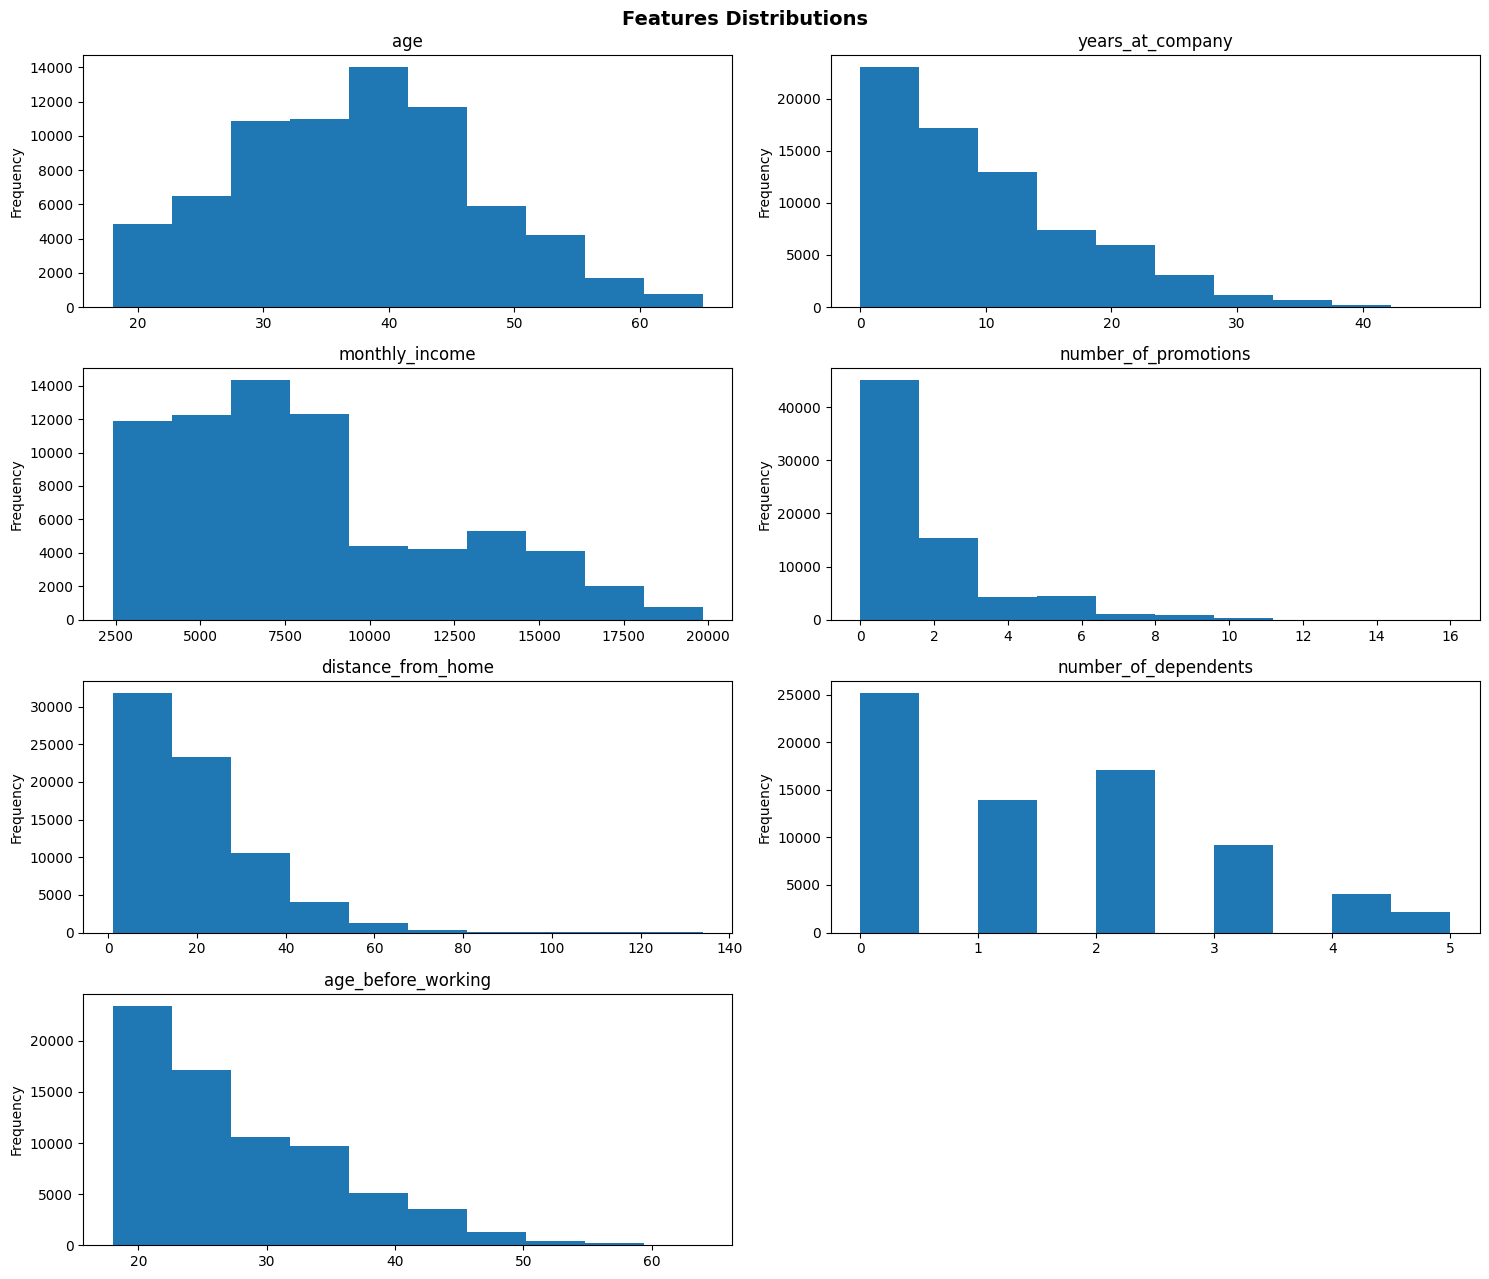

In [589]:
df_plotting =df.select_dtypes(include='number').drop(columns= ["employee_id"])
fig = plt.figure(figsize=(15, 13))
for i, column in enumerate(df_plotting.columns, 1):
    plt.subplot(4, 2, i)
    df[column].plot(kind='hist')
    plt.title(column)
    plt.xticks(rotation = 0)
    plt.tight_layout()

fig.suptitle("Features Distributions", fontsize = 14, weight = "bold")
fig.tight_layout()
fig.show()

/tmp/ipykernel_84875/1186003291.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



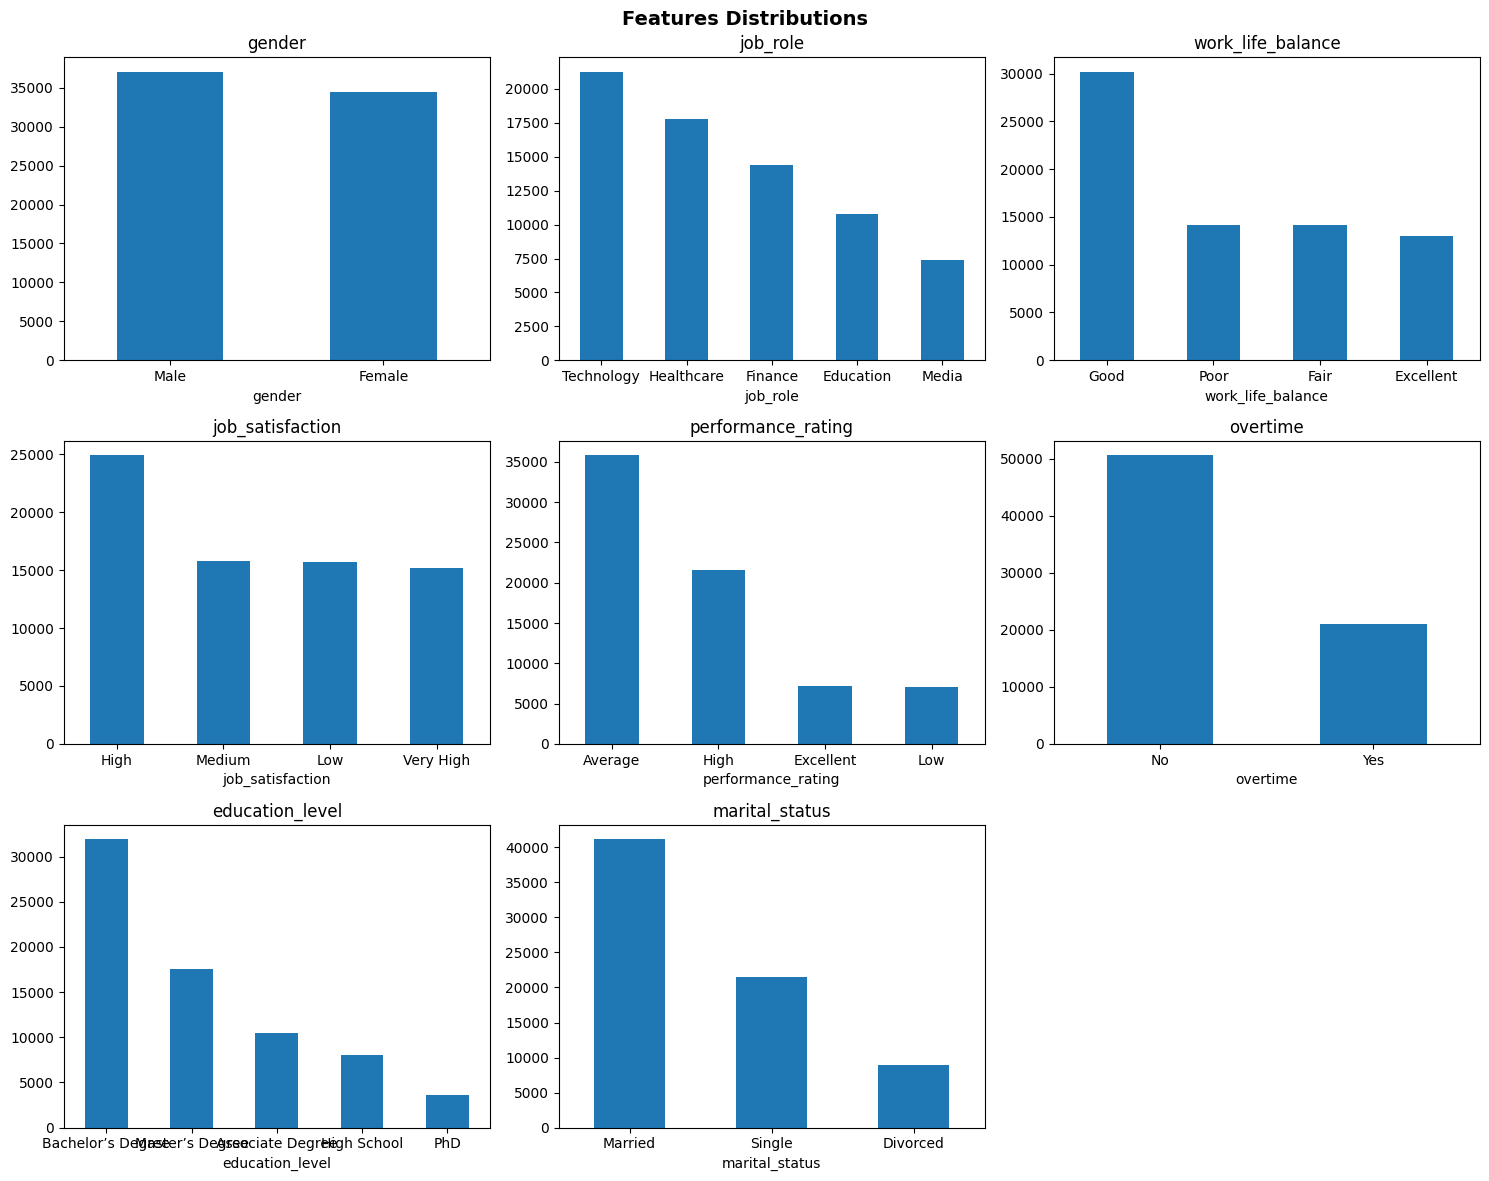

In [590]:
df_plotting =df.select_dtypes(include='object')
fig = plt.figure(figsize=(15, 12))
for i, column in enumerate(df_plotting.columns[0:8], 1):
    plt.subplot(3, 3, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation = 0)
    plt.tight_layout()

fig.suptitle("Features Distributions", fontsize = 14, weight = "bold")
fig.tight_layout()
fig.show()

/tmp/ipykernel_84875/3125199667.py:12: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



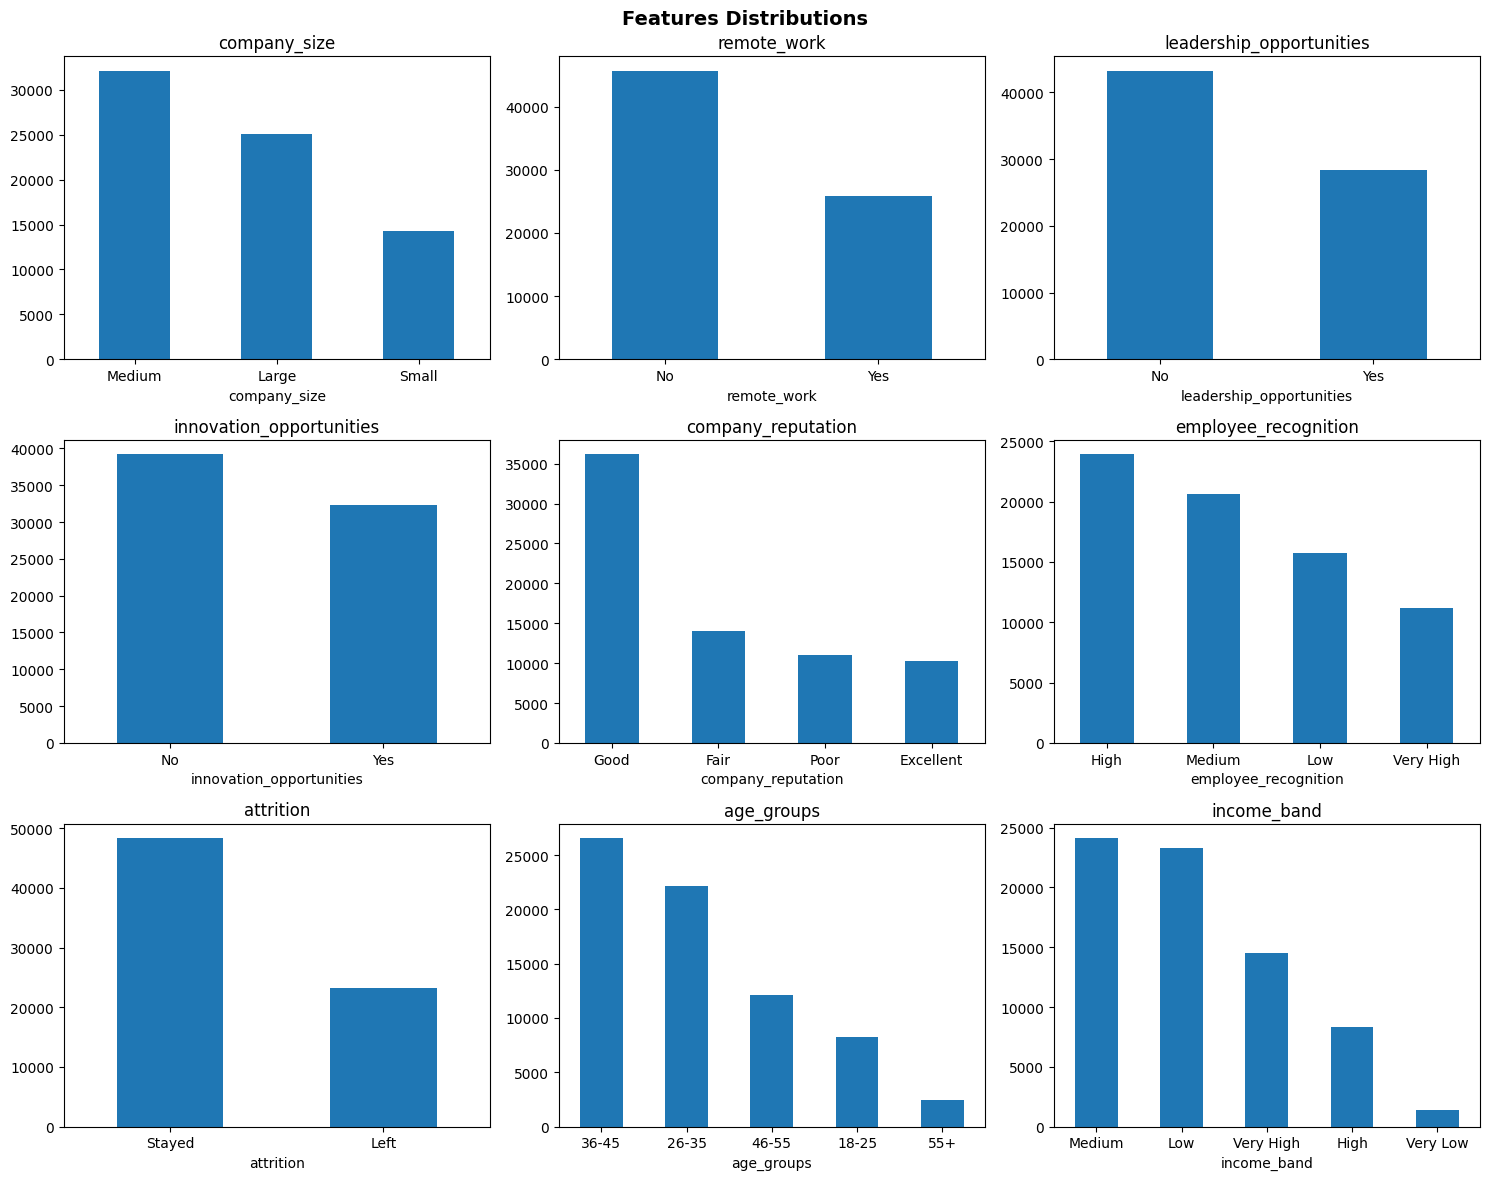

In [591]:
df_plotting =df.select_dtypes(include=['object', 'category'])
fig = plt.figure(figsize=(15, 12))
for i, column in enumerate(df_plotting.columns[9:], 1):
    plt.subplot(3, 3, i)
    df[column].value_counts().plot(kind='bar')
    plt.title(column)
    plt.xticks(rotation = 0)
    plt.tight_layout()

fig.suptitle("Features Distributions", fontsize = 14, weight = "bold")
fig.tight_layout()
fig.show()

#### Age

In [592]:
fig = px.histogram(df["age"])
fig.show()

#### Years at Compnay

In [593]:
fig = px.histogram(df["years_at_company"], labels= {"years_at_company": "Years at company"})
fig.show()

#### Monthly Income

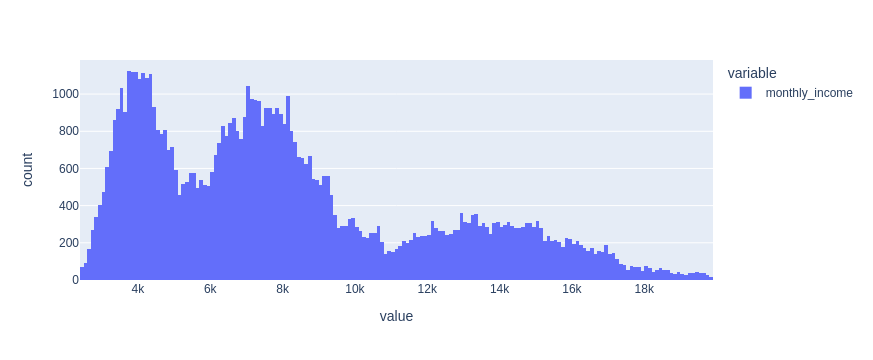

In [594]:
fig = px.histogram(df["monthly_income"])
fig.show()

#### Overtime

In [595]:
jobRole_overtime = df.groupby(["overtime", "job_role"])["employee_id"].count().reset_index()
jobRole_overtime = jobRole_overtime.rename(columns={"employee_id": "count"})
fig = px.sunburst(
    jobRole_overtime,
    path=["overtime", "job_role"],  # hierarchy levels
    values="count",                 # size of each slice
    title="Job Role Distribution by Overtime"
)

fig.show()

In [596]:
fig = px.pie(df, names="age_groups", title="Age Groups")
fig.show()

In [597]:
# Select numeric columns (drop first column)
df_plotting = df.iloc[:, 1:].select_dtypes(include=["number"])

# Create a 2x4 subplot grid (adjust if you have more/less than 8 features)
rows, cols = 2, 4
fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=df_plotting.columns,
    horizontal_spacing=0.08,
    vertical_spacing=0.15
)

# Add each boxplot
for i, column in enumerate(df_plotting.columns):
    r = i // cols + 1
    c = i % cols + 1
    fig.add_trace(
        go.Box(
            y=df_plotting[column],
            name=column,
            boxmean='sd',
            marker_color='rgb(0, 128, 255)',
            fillcolor='rgba(0,128,255,0.3)',
            line=dict(color='rgb(0, 80, 180)'),
        ),
        row=r, col=c
    )

# Update layout for beauty
fig.update_layout(
    height=700,
    width=1200,
    title=dict(
        text="Boxplots of Numeric Features (Interactive & Styled)",
        x=0.5,
        font=dict(size=20, family="Arial", color="black")
    ),
    showlegend=False,
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(size=12),
)

fig.update_yaxes(showgrid=True, gridcolor='lightgrey')
fig.update_xaxes(showticklabels=False)

fig.show()


In [598]:
# import pandas as pd
# from sklearn.impute import KNNImputer

# # Step 1: Identify unrealistic values
# mask = df["years_at_company"] >= 40

# # Step 2: Temporarily set those to NaN (for KNN to fill in)
# df.loc[mask, "years_at_company"] = None

# # Step 3: Select numeric columns for KNN (so it has features to learn from)
# num_cols = df.select_dtypes(include="number").columns

# # Step 4: Initialize and apply the imputer
# imputer = KNNImputer(n_neighbors=5)
# df[num_cols] = imputer.fit_transform(df[num_cols])
# print(df["years_at_company"].describe())


In [599]:
# df["years_at_company"] = df.apply(
#     lambda row: 0 if row["age"] <= 16 else row["years_at_company"],
#     axis=1
# )


In [600]:
df.head()

employee_id  age  gender  years_at_company    job_role  monthly_income  \
0        51005   20    Male                 0  Healthcare            3399   
1        11454   34  Female                13     Finance           14568   
2         9692   44    Male                16  Technology           13291   
3        51993   37  Female                 6  Technology            7699   
4        23532   38    Male                 3   Education            7698   

  work_life_balance job_satisfaction performance_rating  number_of_promotions  \
0              Poor              Low            Average                     0   
1              Good           Medium            Average                     3   
2              Good        Very High          Excellent                     4   
3              Good             High               High                     1   
4              Good        Very High          Excellent                     1   

   ... company_size  remote_work leadership_opportunities  \
0  ...        Small           No                       No   
1  ...        Large           No                      Yes   
2  ...        Small           No                      Yes   
3  ...       Medium          Yes                      Yes   
4  ...        Large           No                       No   

  innovation_opportunities  company_reputation employee_recognition attrition  \
0                      Yes                Poor                  Low      Left   
1                      Yes                Good                 High    Stayed   
2                      Yes           Excellent                 High    Stayed   
3                      Yes                Good                 High    Stayed   
4                       No                Good            Very High    Stayed   

  age_groups age_before_working income_band  
0      18-25                 20         Low  
1      26-35                 21   Very High  
2      36-45                 28   Very High  
3      36-45                 31      Medium  
4      36-45                 35      Medium  

[5 rows x 26 columns]

In [601]:
# df["age_before_working"] = df["age"] - df["years_at_company"]

In [602]:
# df = df[(df["age"] - df["years_at_company"]) >= 16]

In [603]:
# Select numeric columns (drop first column)
df_plotting = df.iloc[:, 1:].select_dtypes(include=["number"])

# Create a 2x4 subplot grid (adjust if you have more/less than 8 features)
rows, cols = 2, 4
fig = make_subplots(
    rows=rows,
    cols=cols,
    subplot_titles=df_plotting.columns,
    horizontal_spacing=0.08,
    vertical_spacing=0.15
)

# Add each boxplot
for i, column in enumerate(df_plotting.columns):
    r = i // cols + 1
    c = i % cols + 1
    fig.add_trace(
        go.Box(
            y=df_plotting[column],
            name=column,
            boxmean='sd',
            marker_color='rgb(0, 128, 255)',
            fillcolor='rgba(0,128,255,0.3)',
            line=dict(color='rgb(0, 80, 180)'),
        ),
        row=r, col=c
    )

# Update layout for beauty
fig.update_layout(
    height=700,
    width=1200,
    title=dict(
        text="Boxplots of Numeric Features (Interactive & Styled)",
        x=0.5,
        font=dict(size=20, family="Arial", color="black")
    ),
    showlegend=False,
    plot_bgcolor="white",
    paper_bgcolor="white",
    font=dict(size=12),
)

# Make axis labels prettier
fig.update_yaxes(showgrid=True, gridcolor='lightgrey')
fig.update_xaxes(showticklabels=False)

fig.show()


In [604]:
df_new = df.copy()
df_new["attrition"] = np.where(df_new["attrition"] == "Left", 1, 0)

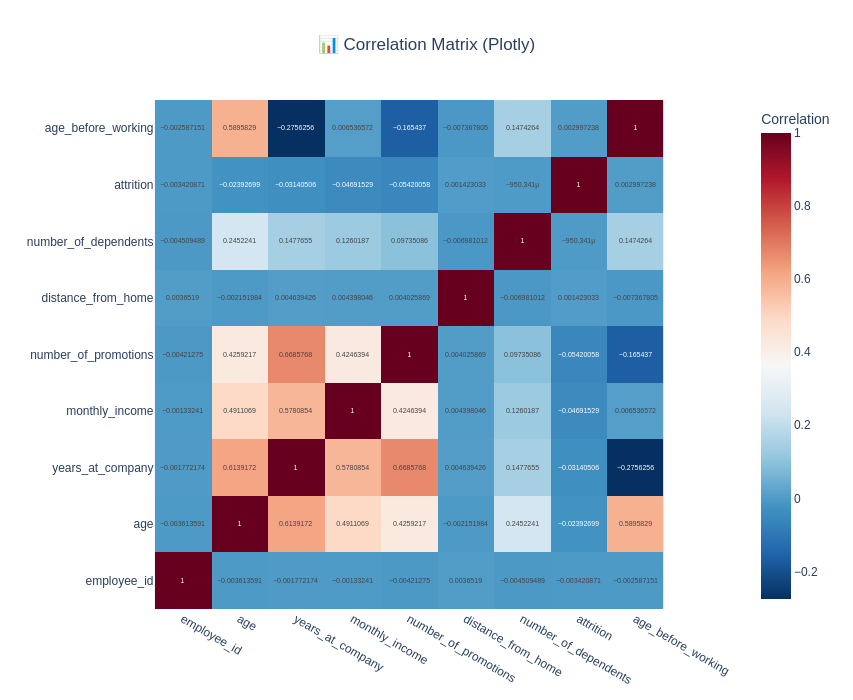

In [605]:
# Select only numeric columns
df_numeric = df_new.select_dtypes(include='number')

# Compute correlation matrix
corr = df_numeric.corr(method= "pearson")

# Create Plotly heatmap
fig = px.imshow(
    corr,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    origin='lower',
    title="📊 Correlation Matrix (Plotly)"
)

# Beautify layout
fig.update_layout(
    title_x=0.5,
    width=800,
    height=700,
    coloraxis_colorbar=dict(title="Correlation"),
    font=dict(size=12),
    xaxis_showgrid=False,
    yaxis_showgrid=False,
)

fig.show()


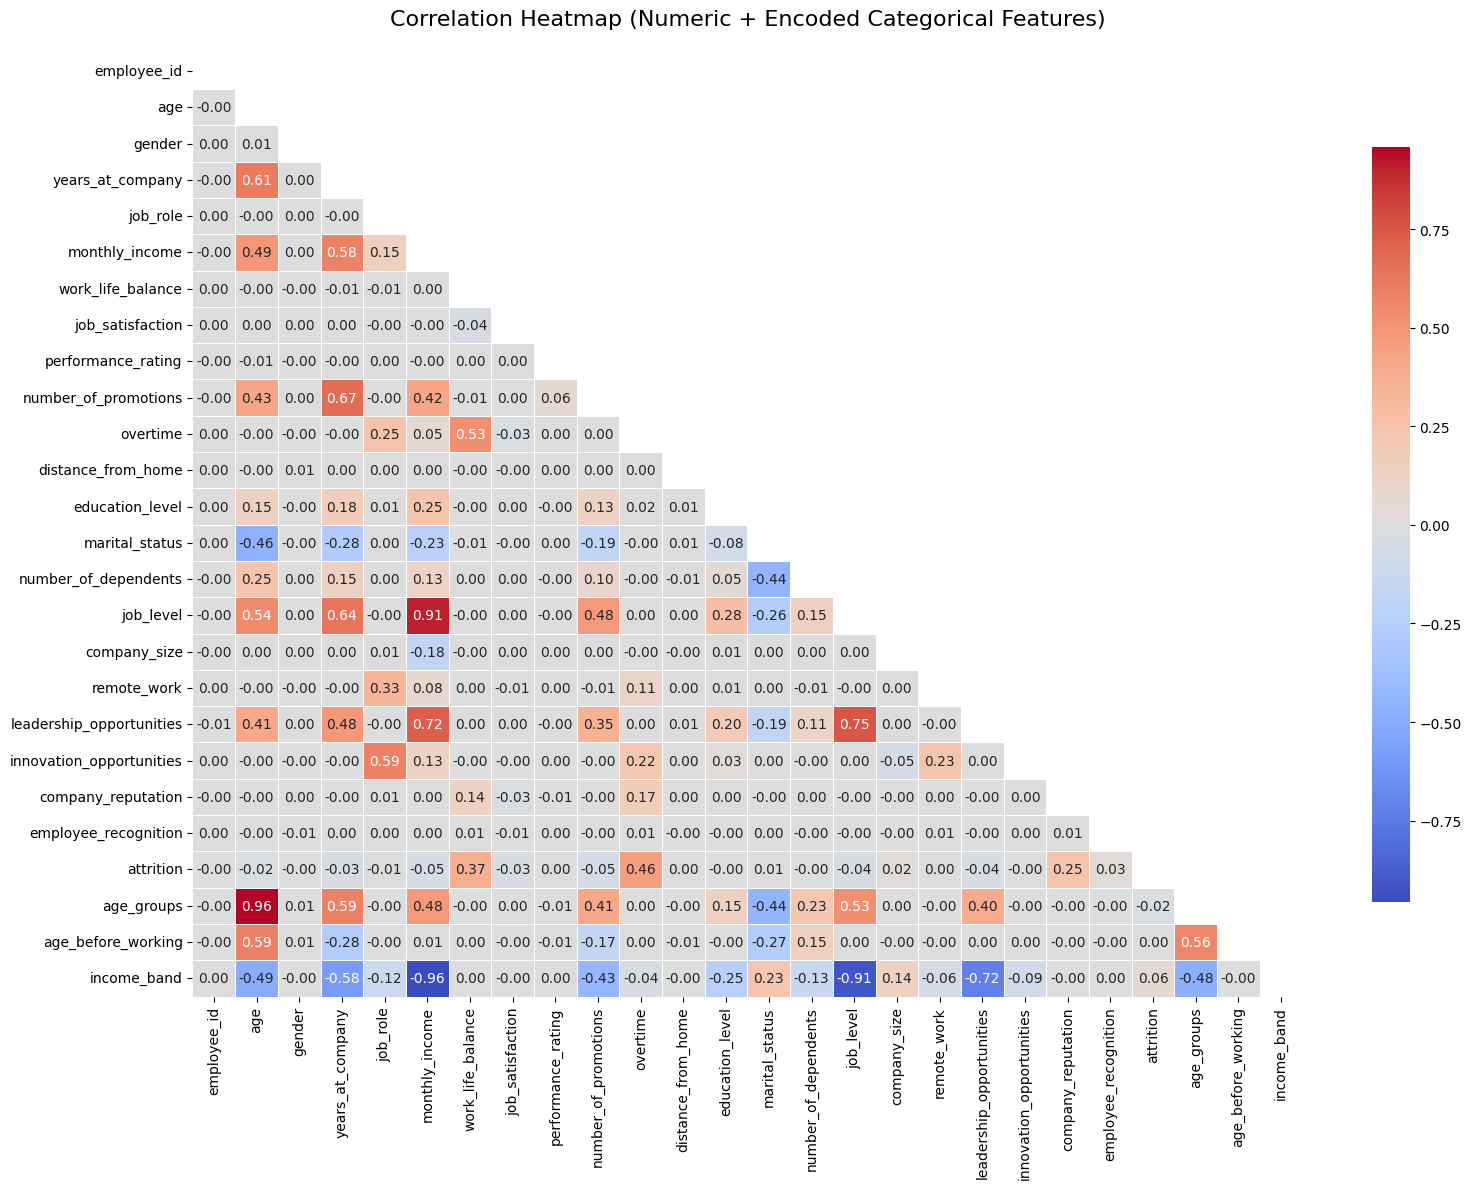

In [606]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# === Load your dataset ===
# Replace with your actual file name

# === Encode categorical features ===
# Convert all categorical columns to numeric codes (Label Encoding)
# This preserves correlation calculation logic
for col in df.select_dtypes(include=['object', 'category']).columns:
    df_new[col] = df_new[col].astype('category').cat.codes

# === Compute correlation matrix ===
corr_matrix = df_new.corr(numeric_only=True)

# === Create a mask for upper triangle (optional, for clarity) ===
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# === Plot the heatmap ===
plt.figure(figsize=(16, 12))
sns.heatmap(
    corr_matrix,
    mask=mask,
    cmap="coolwarm",
    annot=True,
    fmt=".2f",
    linewidths=0.5,
    cbar_kws={"shrink": 0.8}
)
plt.title("Correlation Heatmap (Numeric + Encoded Categorical Features)", fontsize=16, pad=20)
plt.tight_layout()
plt.show()

In [607]:
import pandas as pd
from scipy.stats import pointbiserialr
from sklearn.feature_selection import mutual_info_classif

target_col = 'attrition'  # change this

numeric_cols = df_new.select_dtypes(include=['number']).columns.drop(target_col)

results = []

# Point-biserial correlation
for col in numeric_cols:
    r, p = pointbiserialr(df_new[target_col], df_new[col])
    results.append({'Feature': col, 'Correlation': r, 'P-value': p})

relation_df = pd.DataFrame(results)

# Mutual information
mi = mutual_info_classif(df_new[numeric_cols], df_new[target_col], random_state=0)
relation_df['Mutual Information'] = mi

# Sort by importance
relation_df = relation_df.sort_values(by='Mutual Information', ascending=False)

print(relation_df)

                     Feature  Correlation       P-value  Mutual Information
7           job_satisfaction    -0.031840  1.596937e-17            0.270415
6          work_life_balance     0.368921  0.000000e+00            0.237286
21      employee_recognition     0.026527  1.267797e-12            0.201558
20        company_reputation     0.246065  0.000000e+00            0.192793
10                  overtime     0.456381  0.000000e+00            0.103085
13            marital_status     0.009711  9.379860e-03            0.007436
2                     gender    -0.003120  4.038955e-01            0.006835
24               income_band     0.056734  4.145499e-52            0.005514
15                 job_level    -0.037009  4.002683e-23            0.004917
4                   job_role    -0.011741  1.683550e-03            0.004742
18  leadership_opportunities    -0.038699  3.902778e-25            0.004591
17               remote_work     0.004459  2.328982e-01            0.003364
16          

In [608]:
df.drop(columns="income_band", inplace=True)

In [609]:
df.to_csv("../../../data/Faker_Data/Preprocessed_Data/preprocessed_data.csv", index=False)